In [174]:
import pandas as pd
import networkx as nx

import csv

import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
df = pd.read_csv("../../data/github-organizations.csv")

In [158]:
df.head(5)

,Organisation,member
0,ethereum,Oleh Aldekein
1,ethereum,NaN
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden


In [159]:
# Graph creation and sampling
sample_size = 50
G = nx.from_pandas_edgelist(df.sample(sample_size, random_state=51), source="Organisation", target="member")

# Visualisations

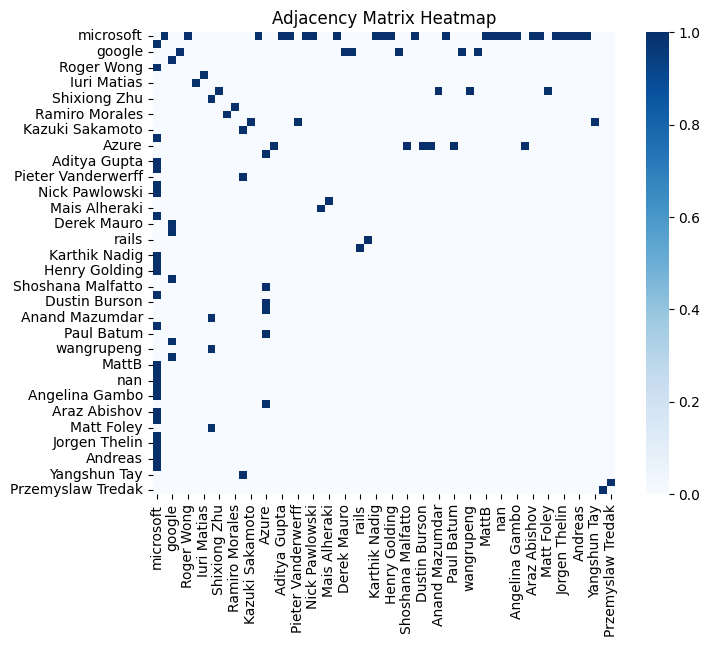

In [160]:
nodes = list(G.nodes())
adj_df = pd.DataFrame(A.toarray(), index=nodes, columns=nodes)

plt.figure(figsize=(8, 6))
sns.heatmap(adj_df, cmap="Blues", annot=False, square=True, cbar=True)
plt.title("Adjacency Matrix Heatmap")
plt.show()

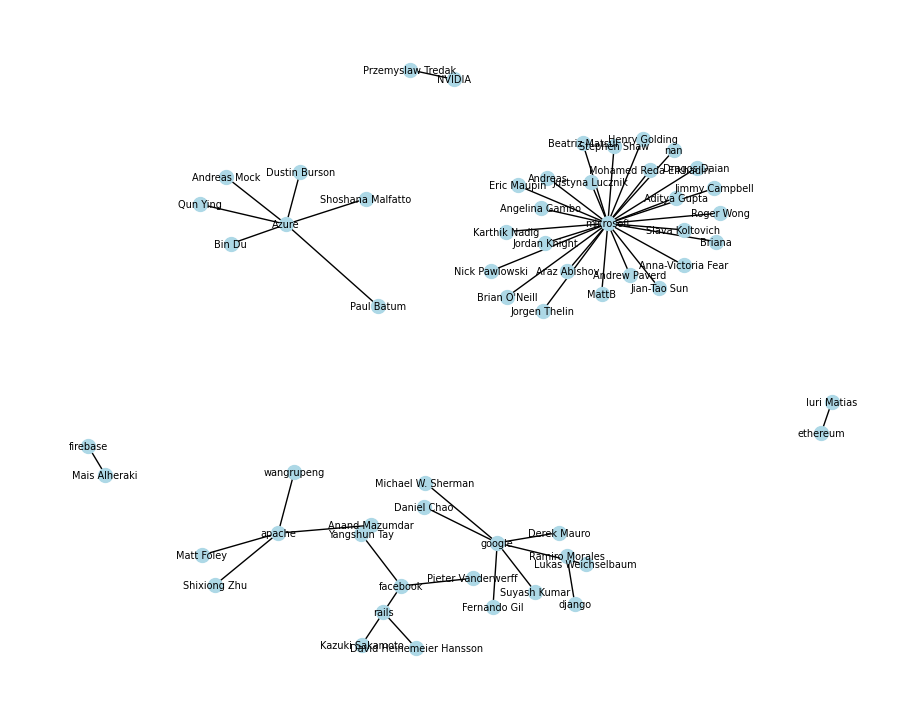

In [161]:
# Graph plot
pos_spring = nx.spring_layout(G, k=0.3, iterations=50, seed=11)

plt.figure(figsize=(9, 7))
nx.draw(G, pos_spring, with_labels=True, node_color="lightblue", node_size=100, font_size=7)
plt.show()

# Network/node parameter calculation

In [ ]:
# Graph creation without sampling
G = nx.from_pandas_edgelist(df, source="Organisation", target="member")

##---NODE PARAMETERS---
# Degrees
print(f"Degrees: {len(G.degree)}")
degrees = dict(G.degree())

df_degrees = pd.DataFrame(list(degrees.items()), columns=["Node", "Degree"])
df_degrees.to_csv("../../data/output/node_degrees.csv", index=False)

# Distance
distances = dict(nx.all_pairs_shortest_path_length(G))
with open("../../data/output/node_distances.csv",'w') as f:
    w = csv.writer(f)
    w.writerow(distances.keys())
    w.writerow(distances.values())

min_distance = min(
    d for distances in distances.values() for d in distances.values() if d > 0
)
print("Minimum non-zero shortest path length:", min_distance)

# Closeness
closeness = nx.closeness_centrality(G)
print(f"Closeness: {closeness}")
df_closeness = pd.DataFrame(list(closeness.items()), columns=["Node", "Degree"])
df_closeness.to_csv("../../data/output/node_closeness.csv", index=False)

# Betweenness
betweenness = nx.betweenness_centrality(G)
print(f"Betweenness: {betweenness}")
df_betweenness = pd.DataFrame(list(betweenness.items()), columns=["Node", "Degree"])
df_betweenness.to_csv("../../data/output/node_betweenness.csv", index=False)

# Clustering coeficients
clustering = nx.clustering(G)
print(f"Clustering {clustering}")
df_clustering = pd.DataFrame(list(clustering.items()), columns=["Node", "Degree"])
df_clustering.to_csv("../../data/output/node_clustering.csv", index=False)

##---NETWORK PARAMETERS---
print("\n\n")
#Diameter
dameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print(f"Diameter: {dameter}")

# Centralization Scores

# Cliques
cliques = list(nx.find_cliques(G))
print(f"Number of cliques: {len(cliques)}")
#print(cliques)

# Clustering coeficients
avg_clustering = nx.average_clustering(G)
print(f"Averaga Clustering {avg_clustering}")

# Modularity
modularity = nx.modularity_matrix(G)
print(f"Modularity: \n{modularity}")

Degrees: 8920
Closeness: {'ethereum': 0.3258929067749012, 'Oleh Aldekein': 0.24546481900500947, nan: 0.48085414012444944, 'Frank Szendzielarz': 0.24546481900500947, 'Kolby Moroz Liebl': 0.24546481900500947, 'Marius van der Wijden': 0.24546481900500947, 'Mihai Alisie': 0.24546481900500947, 'Anton Nashatyrev': 0.24546481900500947, 'Justin Martin': 0.24546481900500947, 'RJ Catalano': 0.24546481900500947, 'Yoshitomo Nakanishi': 0.24546481900500947, 'Alexander Arlt': 0.24546481900500947, 'Alessandro Coglio': 0.24546481900500947, 'acud': 0.24546481900500947, 'Patricio Palladino': 0.24546481900500947, 'Angela Lu': 0.24546481900500947, 'Alex Beregszaszi': 0.24546481900500947, 'becca': 0.24546481900500947, 'Kamil Śliwak': 0.24546481900500947, 'Cesar Brazon': 0.24546481900500947, 'Christian Parpart': 0.24546481900500947, 'Corwin Smith': 0.24546481900500947, 'Marian OANCΞA': 0.24546481900500947, 'Darko Macesic': 0.24546481900500947, 'Daniel Kirchner': 0.24546481900500947, 'Ev': 0.2454648190050094

Minimum non-zero shortest path length: 1
